# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [6]:
de.load_data()
for i, data in enumerate(de.data):
    print(i,data.shape)

0 (620, 18)
1 (536, 18)
2 (515, 18)
3 (667, 18)
4 (525, 18)
5 (483, 18)
6 (618, 18)
7 (457, 18)
8 (507, 18)
9 (493, 18)
10 (509, 18)
11 (453, 18)
12 (483, 18)
13 (568, 18)
14 (567, 18)
15 (566, 18)
16 (558, 18)
17 (552, 18)
18 (566, 18)
19 (633, 18)
20 (638, 18)
21 (607, 18)
22 (477, 18)
23 (531, 18)
24 (940, 18)
25 (562, 18)
26 (564, 18)
27 (522, 18)
28 (486, 18)
29 (541, 18)
30 (586, 18)
31 (505, 18)
32 (498, 18)
33 (433, 18)


In [7]:

de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

steps: 18
self.data_df.shape[0]: 620
steps: 18
self.data_df.shape[0]: 536
steps: 18
self.data_df.shape[0]: 515
steps: 18
self.data_df.shape[0]: 667
steps: 18
self.data_df.shape[0]: 525
steps: 18
self.data_df.shape[0]: 483
steps: 18
self.data_df.shape[0]: 618
steps: 18
self.data_df.shape[0]: 457
steps: 18
self.data_df.shape[0]: 507
steps: 18
self.data_df.shape[0]: 493
steps: 18
self.data_df.shape[0]: 509
steps: 18
self.data_df.shape[0]: 453
steps: 18
self.data_df.shape[0]: 483
steps: 18
self.data_df.shape[0]: 568
steps: 18
self.data_df.shape[0]: 567
steps: 18
self.data_df.shape[0]: 566
steps: 18
self.data_df.shape[0]: 558
steps: 18
self.data_df.shape[0]: 552
steps: 18
self.data_df.shape[0]: 566
steps: 18
self.data_df.shape[0]: 633
steps: 18
self.data_df.shape[0]: 638
steps: 18
self.data_df.shape[0]: 607
steps: 18
self.data_df.shape[0]: 477
steps: 18
self.data_df.shape[0]: 531
steps: 18
self.data_df.shape[0]: 940
steps: 18
self.data_df.shape[0]: 562
steps: 18
self.data_df.shape[0]: 564
s

### 1.3  Transform data

In [8]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (18188,)
X: (18188, 18, 16)

Labels before removal of 'no movements'
0 15618
1 356
2 368
3 575
4 365
5 449
6 457

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (3070,)
X: (3070, 18, 16)

Labels after removal of 'no movements'
0 500
1 356
2 368
3 575
4 365
5 449
6 457

---------------------------------------------------------------------
Shapes after transformation:
y: (3070, 7)
X: (3070, 18, 16)


## 2 Train model

### 2.1  Split in train / test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [11]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
2456/2456 [==============================] - 2s 756us/step - loss: 0.8021 - acc: 0.7195
Epoch 2/50
2456/2456 [==============================] - 1s 445us/step - loss: 0.3414 - acc: 0.8897
Epoch 3/50
2456/2456 [==============================] - 1s 445us/step - loss: 0.2882 - acc: 0.9007
Epoch 4/50
2456/2456 [==============================] - 1s 441us/step - loss: 0.2648 - acc: 0.9076
Epoch 5/50
2456/2456 [==============================] - 1s 455us/step - loss: 0.2735 - acc: 0.9088
Epoch 6/50
2456/2456 [==============================] - 1s 442us/step - loss: 0.2385 - acc: 0.9161
Epoch 7/50
2456/2456 [==============================] - 1s 444us/step - loss: 0.2204 - acc: 0.9230
Epoch 8/50
2456/2456 [==============================] - 1s 442us/step - loss: 0.2190 - acc: 0.9153
Epoch 9/50
2456/2456 [==============================] - 1s 446us/step - loss: 0.2219 - acc: 0.9178
Epoch 10/50
2456/2456 [==============================] - 1s 440us/step - loss: 0.2029 - acc: 0.9226
Epoch 11/

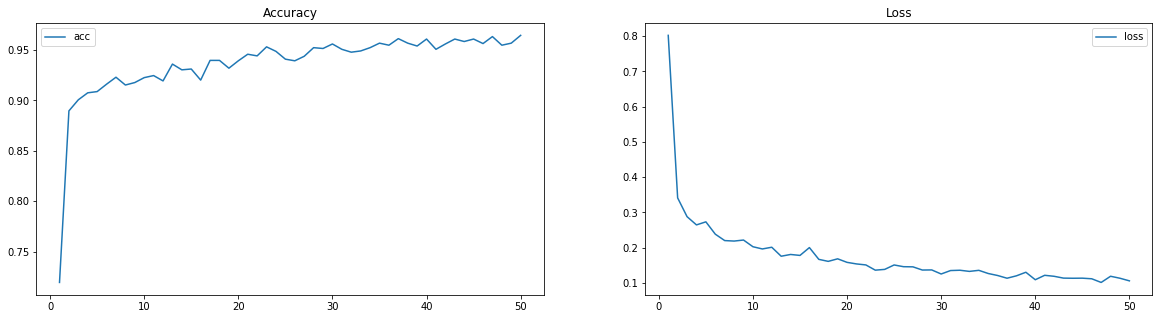

In [13]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [14]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

614/614 [==============================] - 0s 312us/step
Loss:     0.13
Accuracy: 0.97


In [15]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 6 	Pred: 6 	Actual: 0 	Probability: 1.0
Index: 61 	Pred: 2 	Actual: 0 	Probability: 0.67
Index: 84 	Pred: 6 	Actual: 0 	Probability: 0.97
Index: 133 	Pred: 0 	Actual: 5 	Probability: 0.75
Index: 136 	Pred: 2 	Actual: 0 	Probability: 0.95
Index: 151 	Pred: 4 	Actual: 0 	Probability: 0.98
Index: 166 	Pred: 5 	Actual: 1 	Probability: 0.98
Index: 168 	Pred: 2 	Actual: 0 	Probability: 1.0
Index: 288 	Pred: 3 	Actual: 0 	Probability: 1.0
Index: 291 	Pred: 5 	Actual: 0 	Probability: 0.77
Index: 387 	Pred: 5 	Actual: 1 	Probability: 0.99
Index: 424 	Pred: 4 	Actual: 0 	Probability: 1.0
Index: 501 	Pred: 5 	Actual: 1 	Probability: 0.77
Index: 513 	Pred: 5 	Actual: 1 	Probability: 0.87
Index: 525 	Pred: 5 	Actual: 1 	Probability: 0.97
Index: 544 	Pred: 5 	Actual: 1 	Probability: 0.98
Index: 547 	Pred: 5 	Actual: 1 	Probability: 0.94
Index: 552 	Pred: 1 	Actual: 0 	Probability: 0.97
Index: 572 	Pred: 6 	Actual: 0 	Probability: 0.96
Index: 593 	Pred: 2 	Actual: 0 	Probability: 0.59


In [16]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 3 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 4 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 5 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 7 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 8 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 9 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 10 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 11 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 12 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 13 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 14 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 15 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 16 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 17 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 18 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 19 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 20 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 21 	Pred: 6 	Actual: 6 	Probability: 0.9

Index: 203 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 204 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 205 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 206 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 207 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 208 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 209 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 210 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 211 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 212 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 213 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 214 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 215 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 216 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 217 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 218 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 219 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 220 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 221 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 222 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 223 	P

Index: 396 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 397 	Pred: 3 	Actual: 3 	Probability: 0.92
Index: 398 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 399 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 400 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 401 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 402 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 403 	Pred: 5 	Actual: 5 	Probability: 0.96
Index: 404 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 405 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 406 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 407 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 408 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 409 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 410 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 411 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 412 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 413 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 414 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 415 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 416 	Pr

Index: 589 	Pred: 3 	Actual: 3 	Probability: 0.85
Index: 590 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 591 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 592 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 594 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 595 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 596 	Pred: 0 	Actual: 0 	Probability: 0.92
Index: 597 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 598 	Pred: 0 	Actual: 0 	Probability: 0.88
Index: 599 	Pred: 0 	Actual: 0 	Probability: 0.68
Index: 600 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 601 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 602 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 603 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 604 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 605 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 606 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 607 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 608 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 609 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 610 

### 2.4 Save model

In [17]:
from keras.models import load_model
import h5py

In [21]:
# save model, delete current reference and re-load it from file
model.save('model_gesture.h5')
del model
model = load_model('model_gesture.h5')

In [19]:
type(model)

keras.engine.sequential.Sequential